#### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Read dataset and create a dataframe

In [2]:
customer_churn = pd.read_csv('customer_churn.csv')

### Data Understanding

In [3]:
customer_churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dataset & Columns Count

In [4]:
customer_churn.shape

(7043, 21)

#### Dataset Info

In [5]:
customer_churn.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Check for duplicates

In [7]:
customer_churn.duplicated().sum()

0

#### Check for missing values

In [8]:
customer_churn.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Calculate Tenure

In [9]:
# Convert start_date and end_date to datetime
# customer_churn['start_date'] = pd.to_datetime(customer_churn['start_date'])
# customer_churn['end_date'] = pd.to_datetime(customer_churn['end_date'])

# current_date = pd.to_datetime('today')
# customer_churn['Tenure'] = customer_churn.apply(
#     lambda row: ((row['end_date'] if pd.notnull(row['end_date']) else current_date) - row['start_date']).days / 30.44,
#     axis=1
# )

#### Add NPS and assign dummy data

In [10]:
np.random.seed(42)
customer_churn['NPS'] = np.random.randint(60, 101, size=len(customer_churn))

In [11]:
customer_churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,98
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,88
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,74
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,67
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,80


#### Summary of the central tendency, dispersion, and shape of a dataset’s distribution

In [12]:
stats_def = {
    'Statistic': ['Count', 'Mead', 'STD', 'Min', '25%', '50%', '75%', 'Max'],
    'Description': [
        'The number of non-null entries.',
        'The average (mean) value.',
        'The standard deviation.',
        'The minimum value.',
        'The 25th percentile (first quartile).',
        'The 50th percentile (median or second quartile).',
        'The 75th percentile (third quartile).',
        'The maximum value.'
    ]
}

df_stats_def = pd.DataFrame(stats_def)
df_stats_def

,Statistic,Description
0,Count,The number of non-null entries.
1,Mead,The average (mean) value.
2,STD,The standard deviation.
3,Min,The minimum value.
4,25%,The 25th percentile (first quartile).
5,50%,The 50th percentile (median or second quartile).
6,75%,The 75th percentile (third quartile).
7,Max,The maximum value.


In [13]:
customer_churn.describe()

,SeniorCitizen,Tenure,MonthlyCharges,NPS
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,80.072980
std,0.368612,24.559481,30.090047,11.720573
min,0.000000,0.000000,18.250000,60.000000
25%,0.000000,9.000000,35.500000,70.000000
50%,0.000000,29.000000,70.350000,80.000000
75%,0.000000,55.000000,89.850000,90.000000
max,1.000000,72.000000,118.750000,100.000000


### Data Visualization

#### Distribution of Customer Churn Count

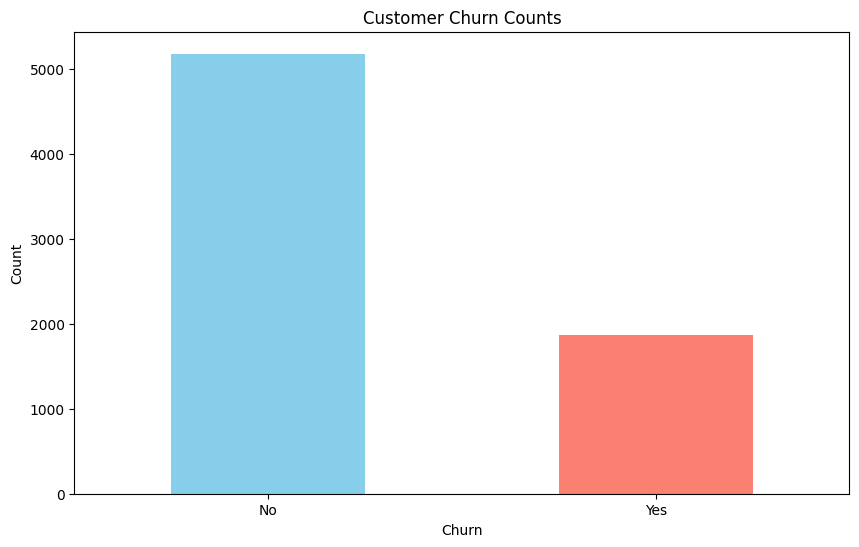

In [14]:
# Count the occurrences of each unique value in the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Distribution of Tenure

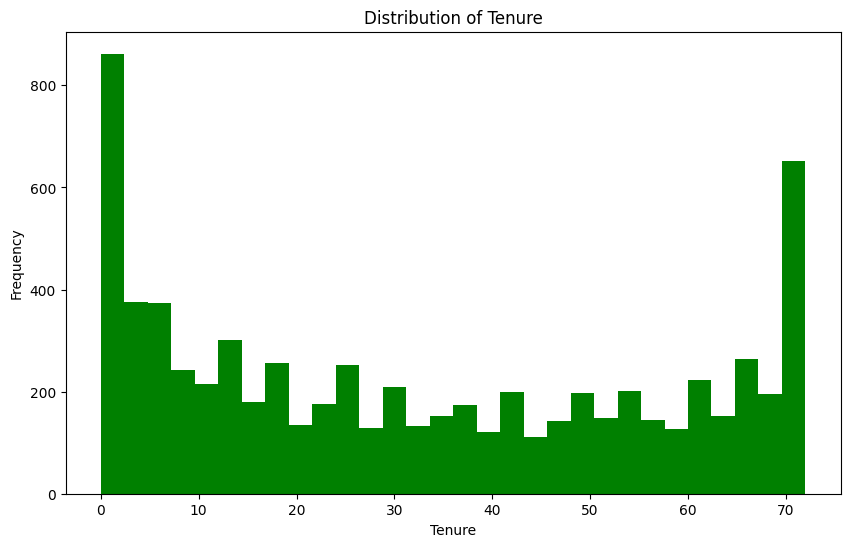

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(customer_churn['Tenure'], bins=30, color="green")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

### Logistic Regression

In [16]:
# Define the features and target variable
x = customer_churn[['NPS','Tenure']]
y = customer_churn[['Churn']]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=0)

# Define the model
log_model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Perform grid search
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
optimized_log_model = LogisticRegression(**best_params)
optimized_log_model.fit(x_train, y_train.values.ravel())

# Make predictions
y_pred = optimized_log_model.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, y_pred))

# Initialize the Predicted column with NaNs
customer_churn['Predicted'] = float('nan')

# Integrate the predicted column into customer_churn DataFrame for the test set
customer_churn.loc[y_test.index, 'Predicted'] = y_pred

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-validation Score: 0.7557244174265451
Confusion Matrix:
[[4387  265]
 [1344  343]]
Accuracy: 74.62%
              precision    recall  f1-score   support

          No       0.77      0.94      0.85      4652
         Yes       0.56      0.20      0.30      1687

    accuracy                           0.75      6339
   macro avg       0.66      0.57      0.57      6339
weighted avg       0.71      0.75      0.70      6339



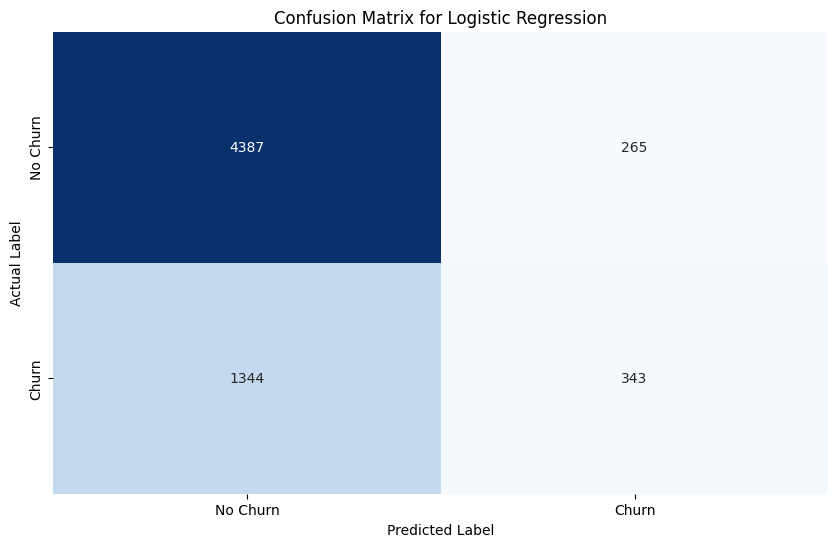

In [17]:
# Display the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

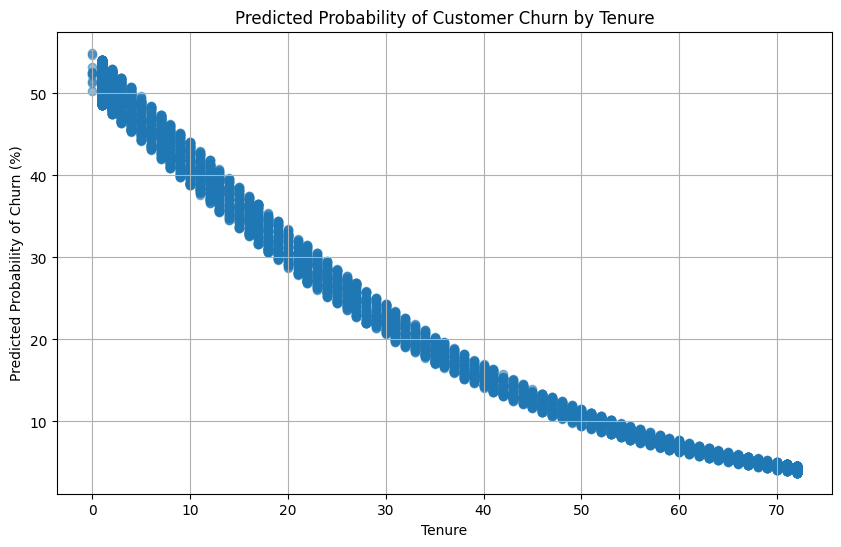

In [18]:
# Get the predicted probabilities for the test set
y_pred_prob = optimized_log_model.predict_proba(x_test)[:, 1]

# Integrate the predicted probabilities into the customer_churn DataFrame for the test set
customer_churn['Predicted_Prob'] = float('nan')
customer_churn.loc[y_test.index, 'Predicted_Prob'] = y_pred_prob

# Convert predicted probabilities to percentages
customer_churn['Predicted_Prob_Percent'] = customer_churn['Predicted_Prob'] * 100

# Plotting tenure vs. predicted probabilities of churn as percentages
plt.figure(figsize=(10, 6))
plt.scatter(customer_churn.loc[y_test.index, 'Tenure'], customer_churn.loc[y_test.index, 'Predicted_Prob_Percent'], alpha=0.5)
plt.xlabel('Tenure')
plt.ylabel('Predicted Probability of Churn (%)')
plt.title('Predicted Probability of Customer Churn by Tenure')
plt.grid(True)
plt.show()

In [19]:
customer_churn.to_csv('log_reg_customer_churn.csv', index=False)
customer_churn

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS,Predicted,Predicted_Prob,Predicted_Prob_Percent
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,98,NaN,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.5,No,88,No,0.186728,18.672815
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,74,Yes,0.510842,51.084242
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,67,No,0.135797,13.579712
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,80,Yes,0.502623,50.262282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.5,No,89,No,0.263569,26.356909
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,72,No,0.043463,4.346299
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,100,No,0.376700,37.669997
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,75,No,0.487007,48.700720
